To Do:
1. How do I change marker size on plots?
2. Error bars
3. Try using Seaborn to create plots
4. Get data for bar graph
5. Drop unnecessary drug information from dataframe

In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [18]:
clinical_data = pd.read_csv('raw_data/clinicaltrial_data.csv')
drug_data = pd.read_csv('raw_data/mouse_drug_data.csv')
df = pd.merge(clinical_data, drug_data, how='right', on='Mouse ID')
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [19]:
#define variables
fontsize = 30
las_vegas = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
drug_list = []

In [42]:
# for drug in las_vegas:
#     drug_df = df.groupby([drug,'Timepoint'])['Tumor Volume (mm3)'].agg('mean').reset_index()
#     drug_list.append(drug_df)

KeyError: 'Capomulin'

In [24]:
#Create a dictionary to house separate dataframes for each drug.
d = {}
for row in df:
    for fear_and_loathing in las_vegas:
        d[str(fear_and_loathing)] = df.loc[df['Drug'] == fear_and_loathing]

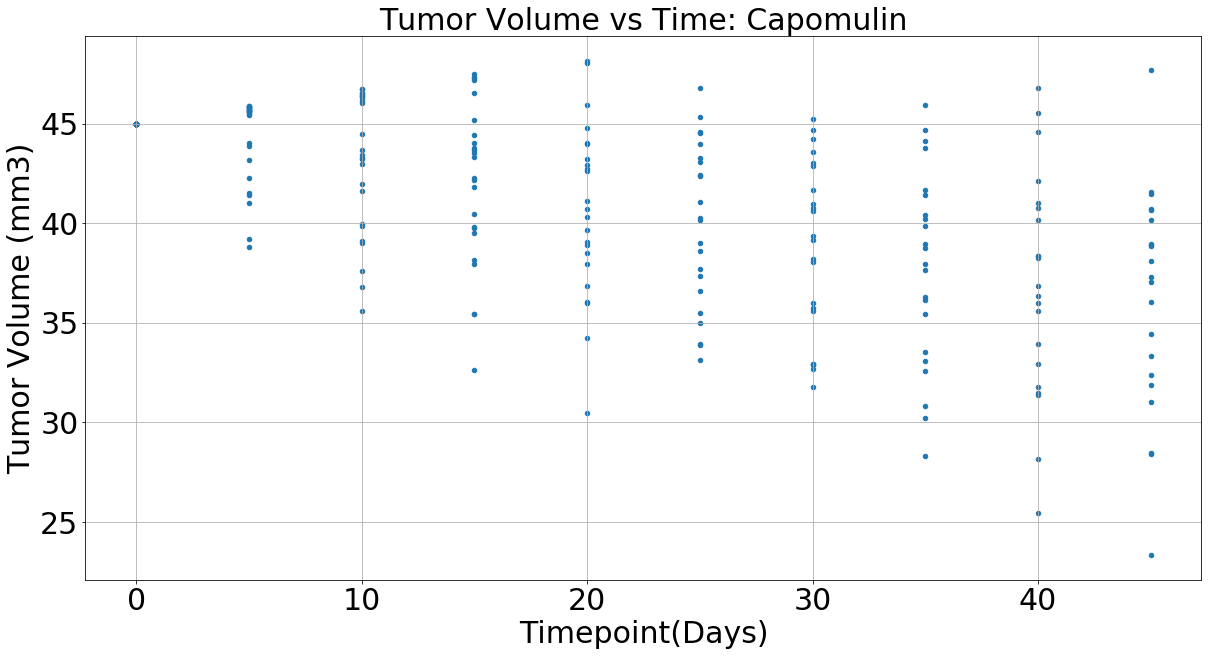

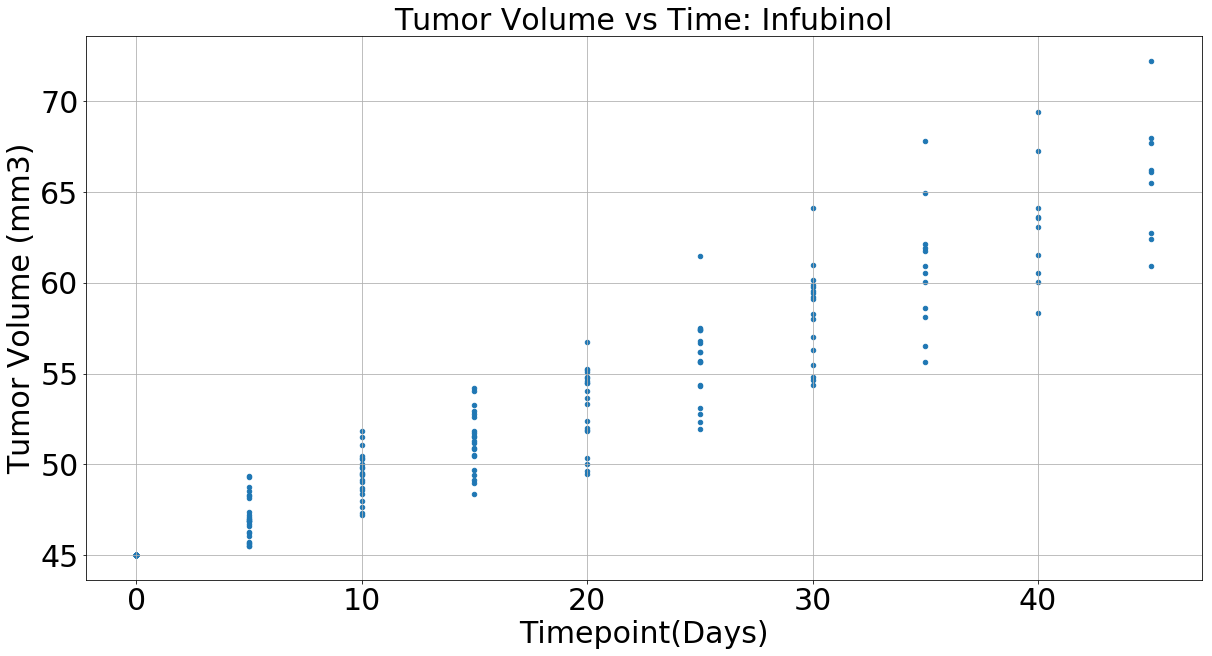

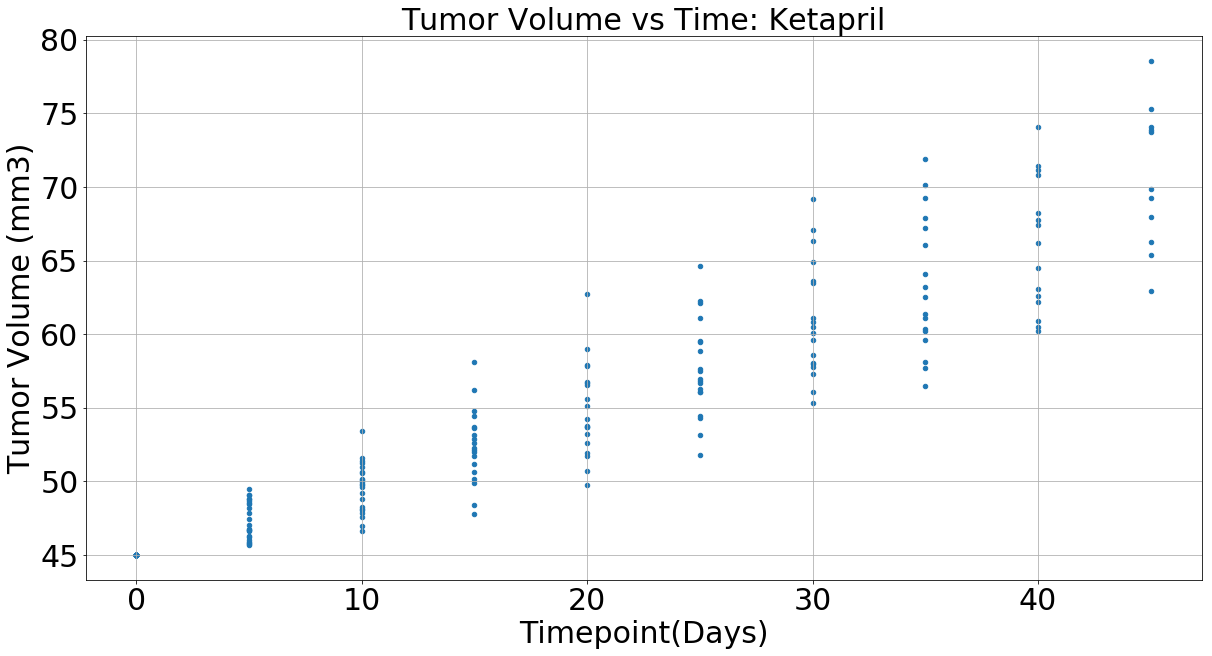

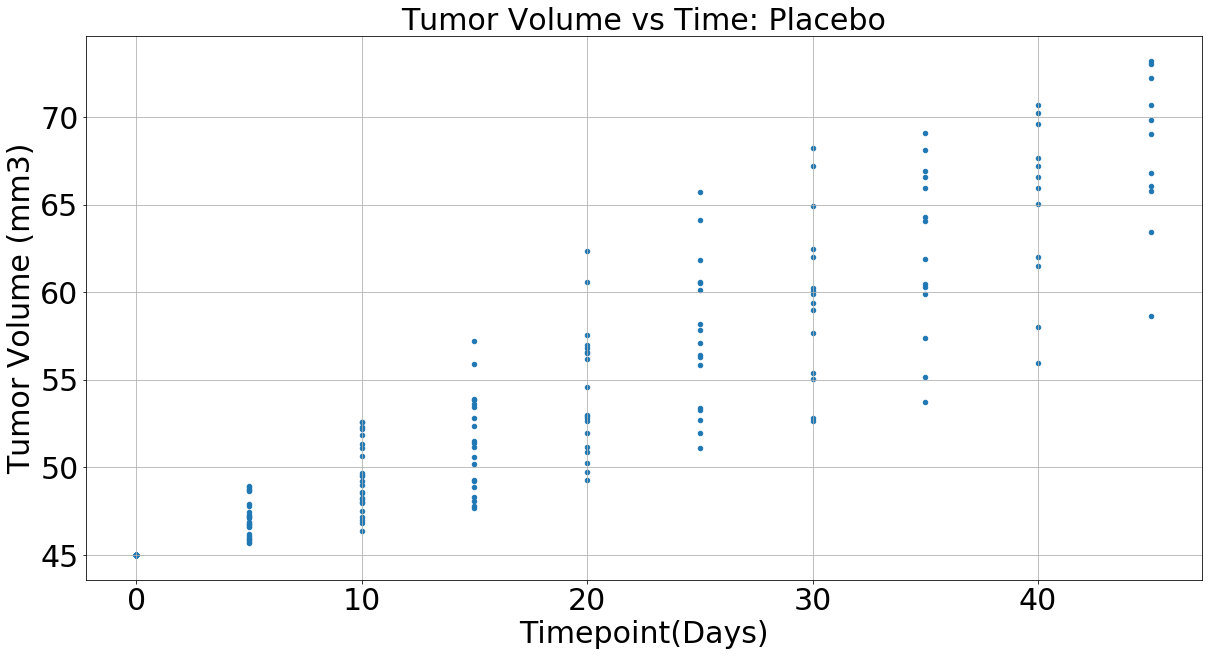

In [28]:
#Create a plot of Tumor Volume for each drug by looping through list of drugs
for fear_and_loathing in las_vegas:
    d[fear_and_loathing].plot(kind='scatter', x='Timepoint',
                       y='Tumor Volume (mm3)', grid=True,
                       figsize=(20,10),
                        fontsize=fontsize)
    plt.title('Tumor Volume vs Time: ' + fear_and_loathing, fontsize=fontsize)
    plt.xlabel('Timepoint(Days)', fontsize=fontsize)
    plt.ylabel('Tumor Volume (mm3)', fontsize=fontsize)

#Still need to pretty up the plots

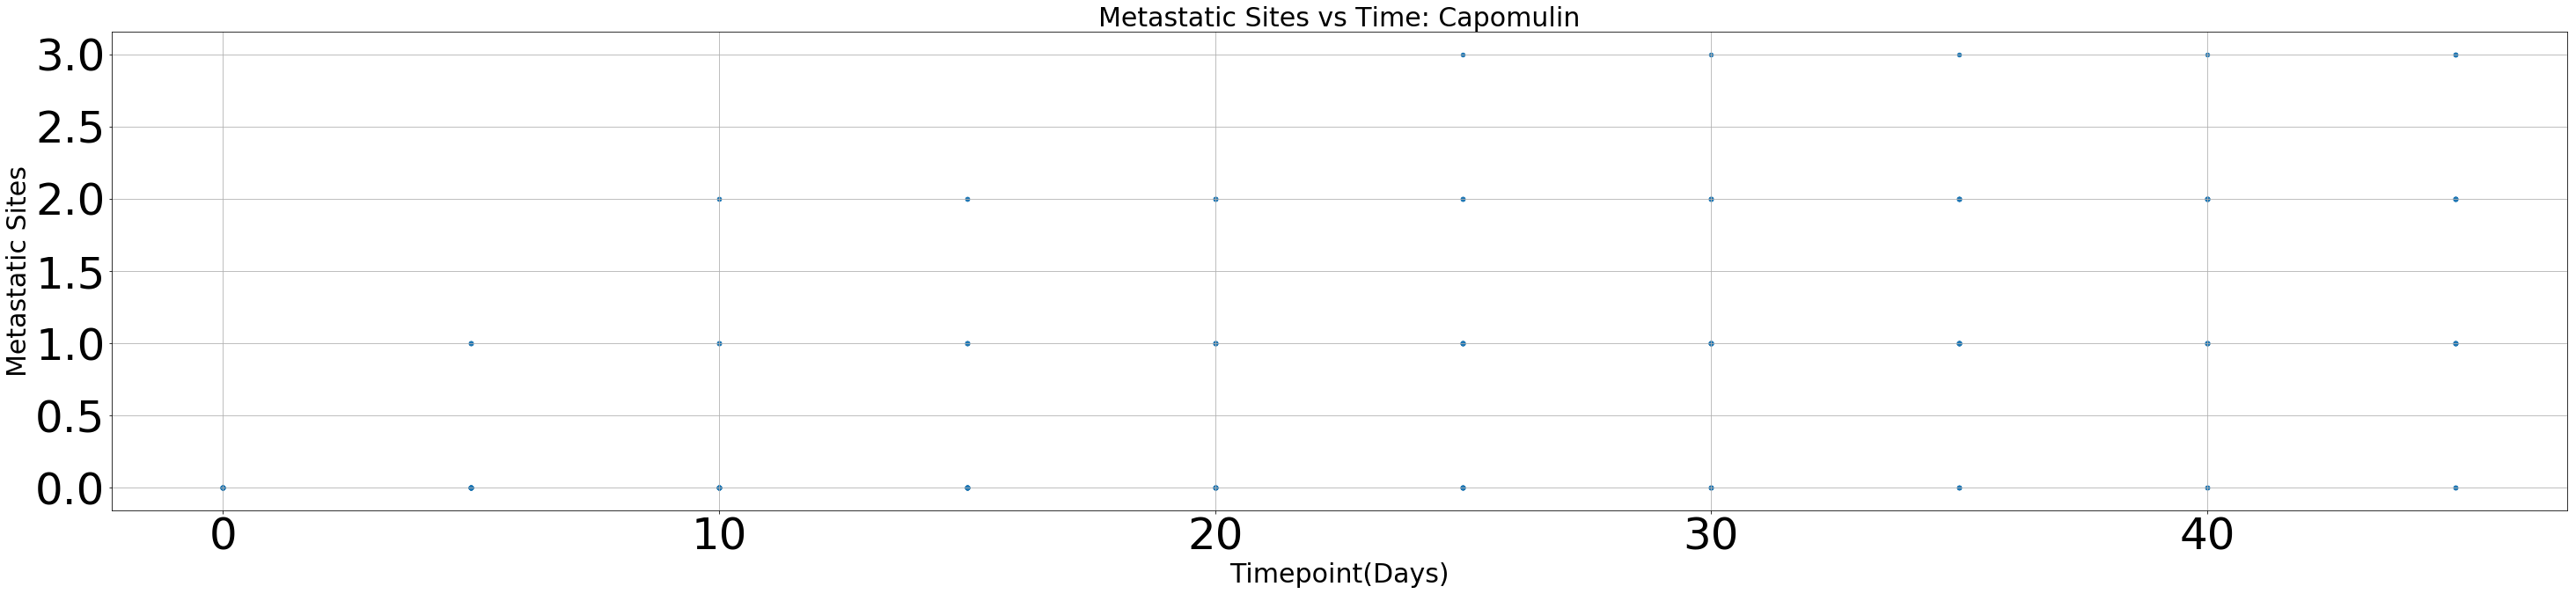

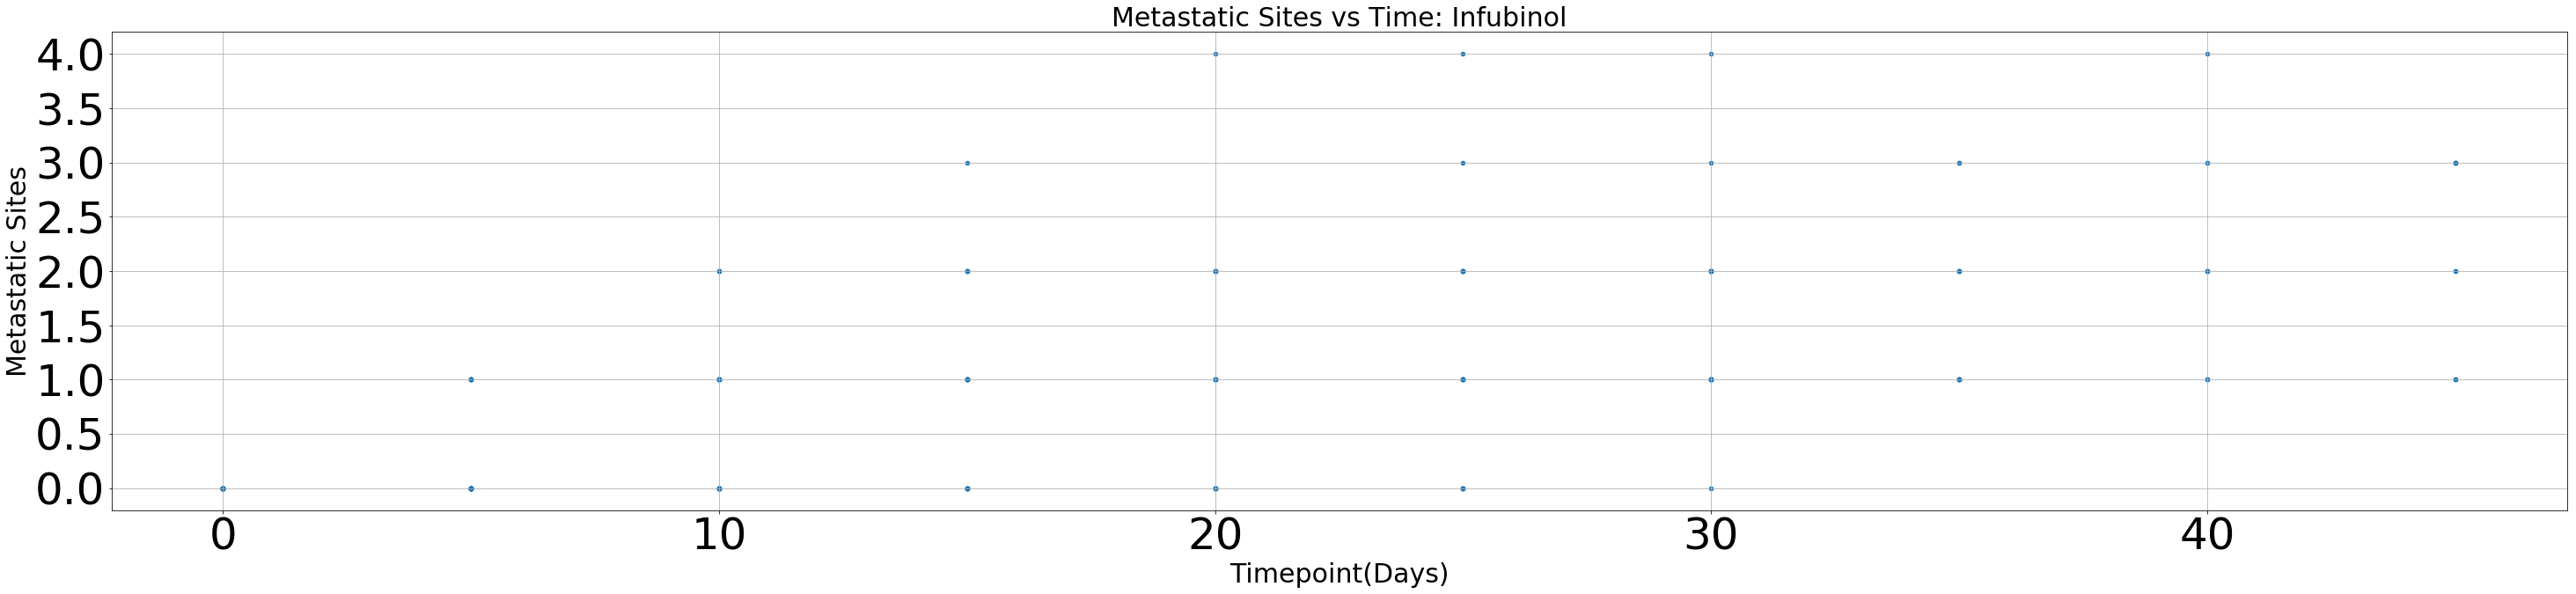

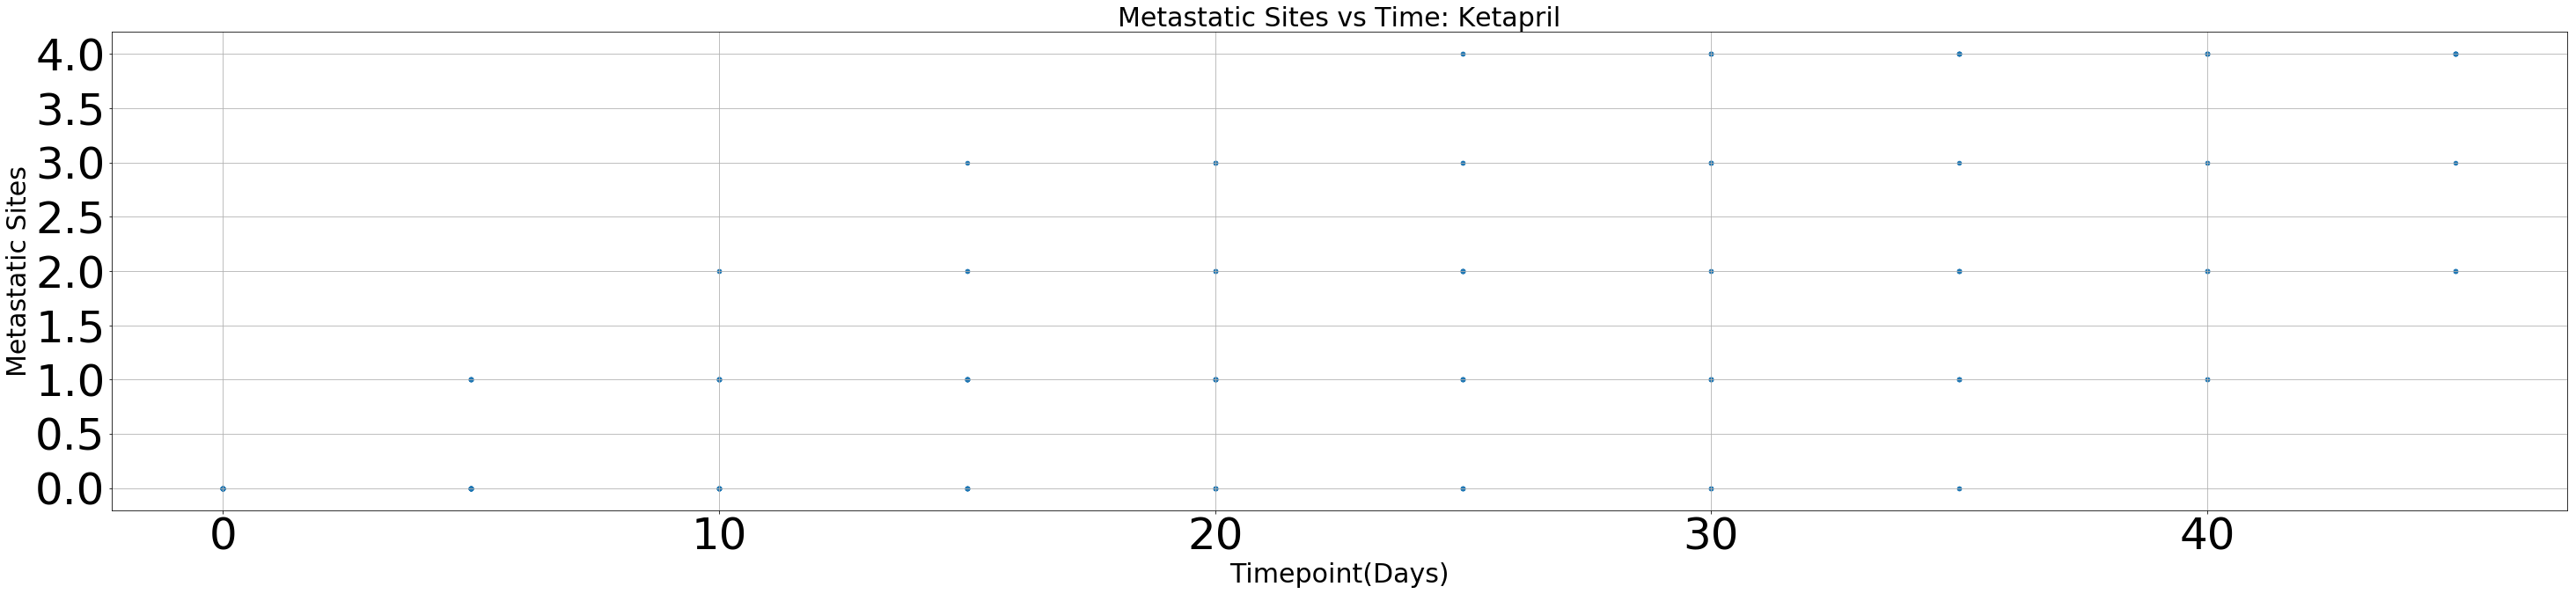

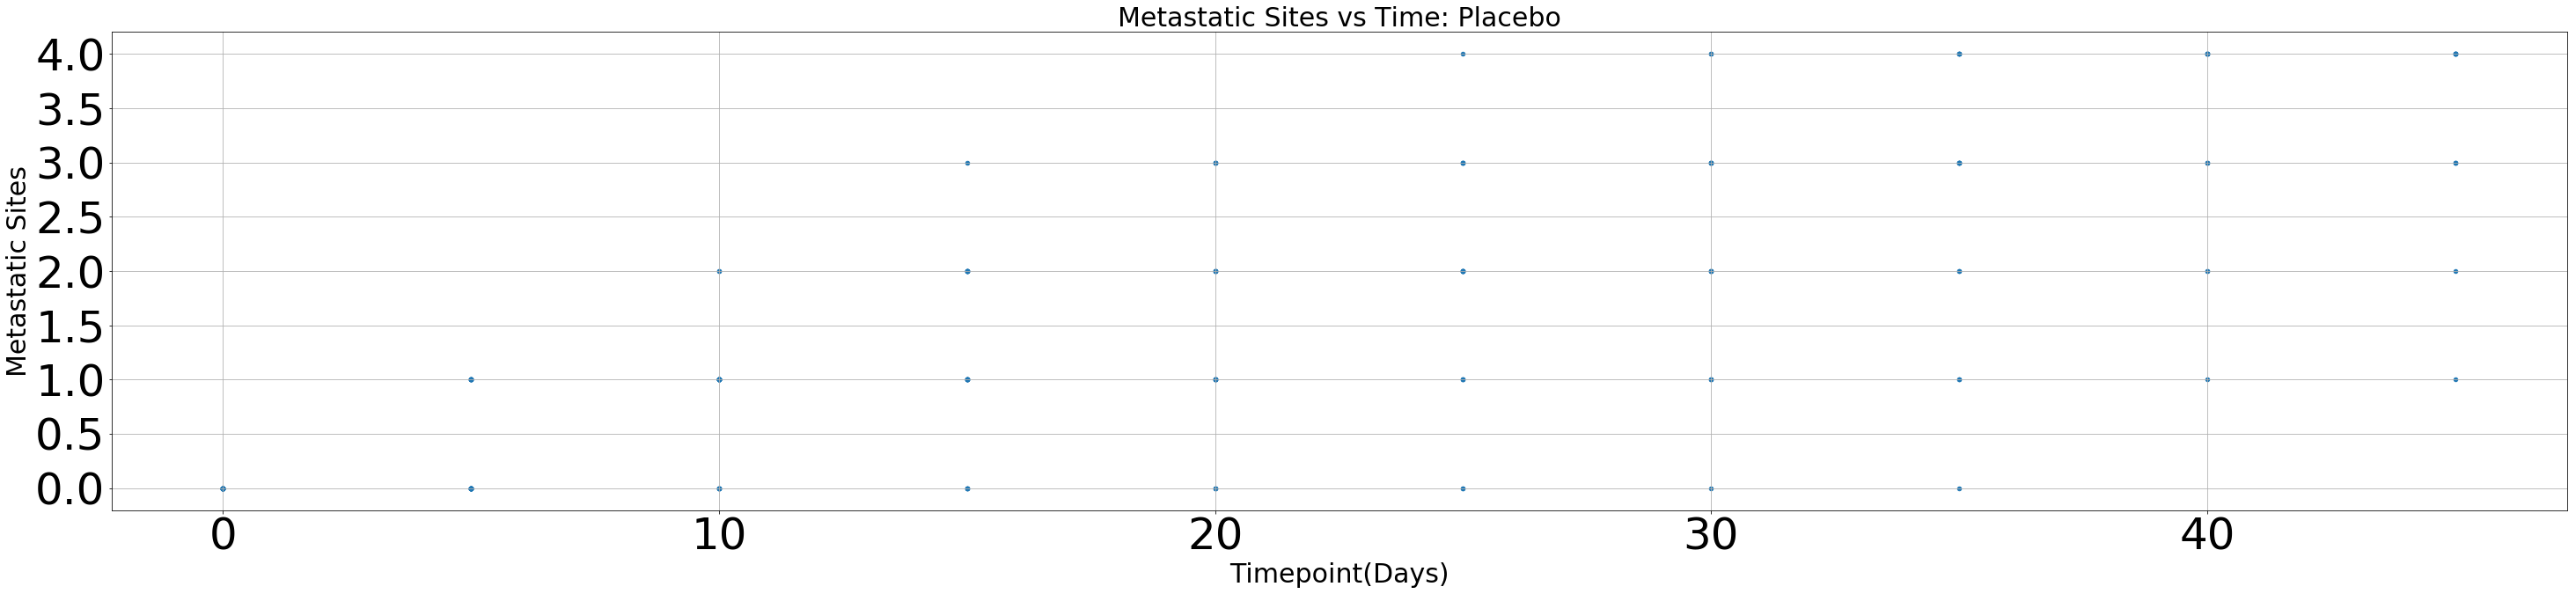

In [29]:
# #Create a plot for metastishits for each drug by looping through list of drugs
#do average
for fear_and_loathing in las_vegas:
    d[fear_and_loathing].plot(kind='scatter', x='Timepoint',
                       y='Metastatic Sites', grid=True,
                       figsize=(50,10), 
                       title='Metastatic Sites vs Time: ' 
                              + fear_and_loathing,
                        fontsize=50)
    plt.title('Metastatic Sites vs Time: ' + fear_and_loathing, fontsize=fontsize)
    plt.xlabel('Timepoint(Days)', fontsize=fontsize)
    plt.ylabel('Metastatic Sites', fontsize=fontsize)

In [8]:
#Create a plot for metastishits for each drug by looping through list of drugs
# for fear_and_loathing in las_vegas:
#     d[fear_and_loathing].plot(kind='scatter', x='Timepoint',
#                        y='Metastatic Sites', grid=True,
#                        figsize=(100,10), 
#                        title='Metastatic Sites vs Time: ' 
#                               + fear_and_loathing,
#                         fontsize=50)
    
#Still need to pretty up the plots

In [31]:
meta_df = df.groupby(['Drug','Timepoint'])['Mouse ID'].count().reset_index()
meta_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


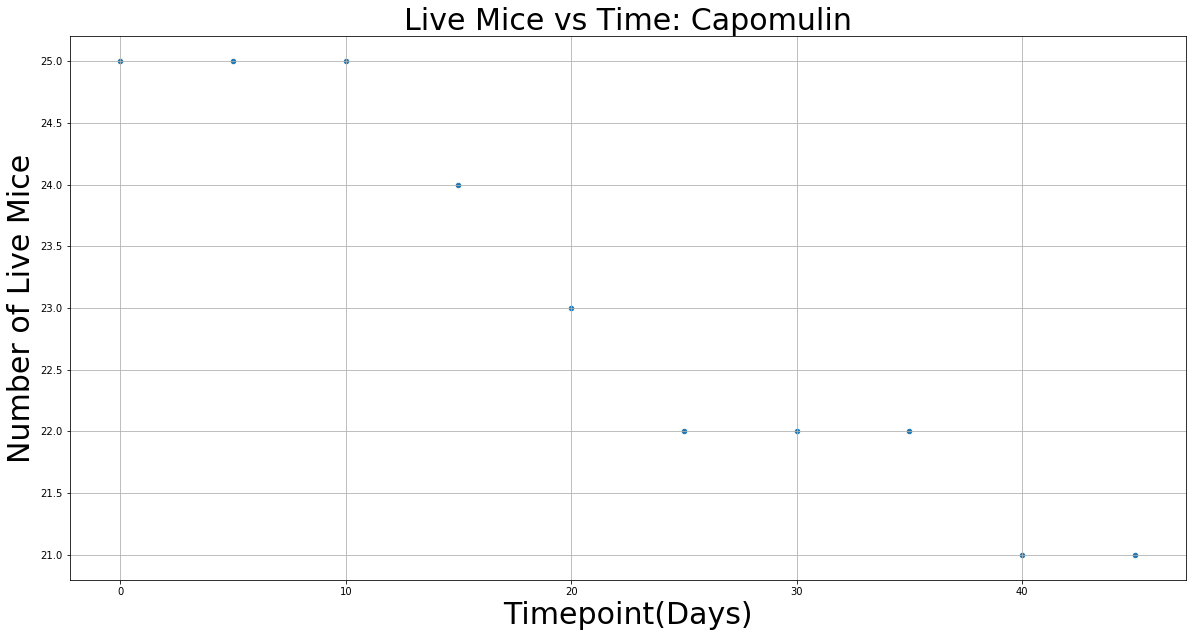

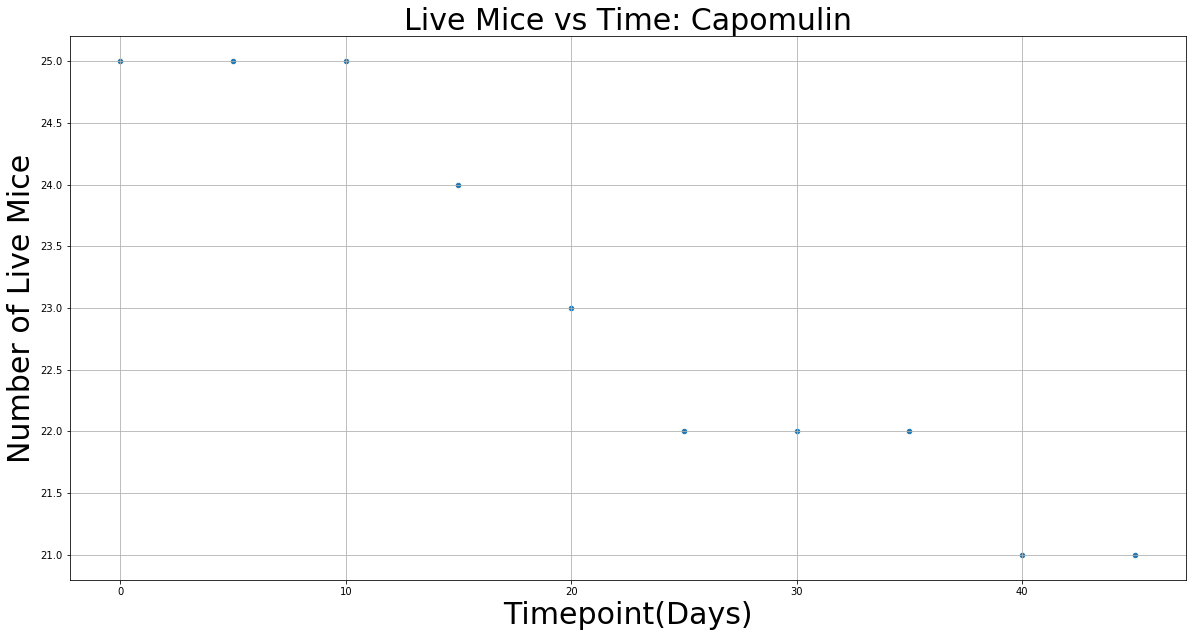

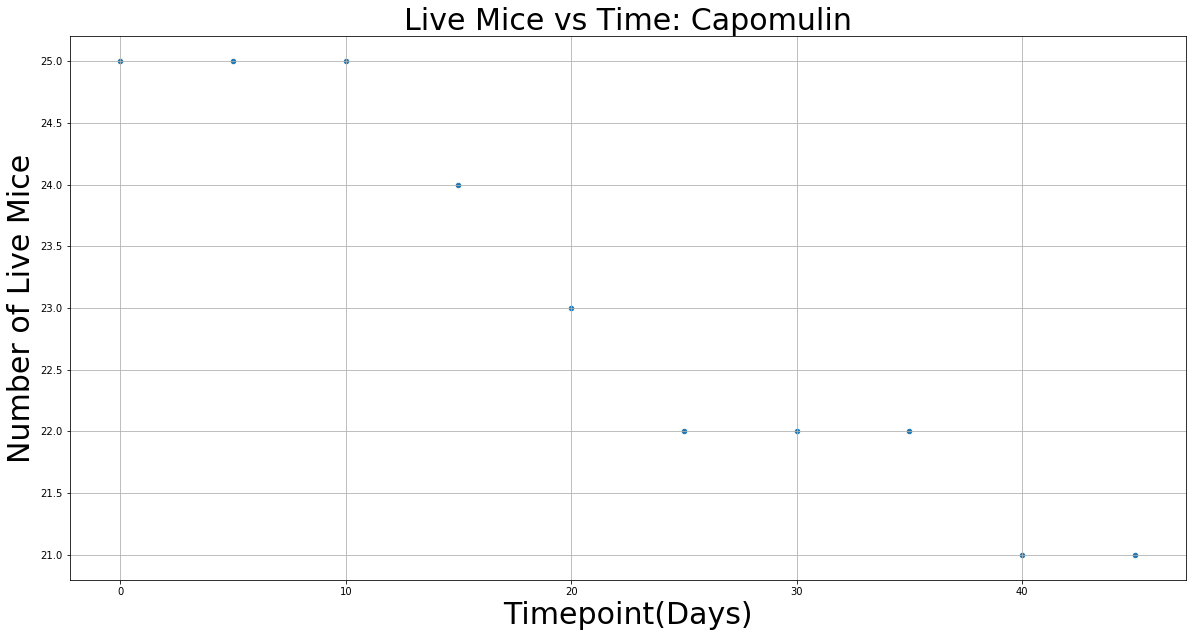

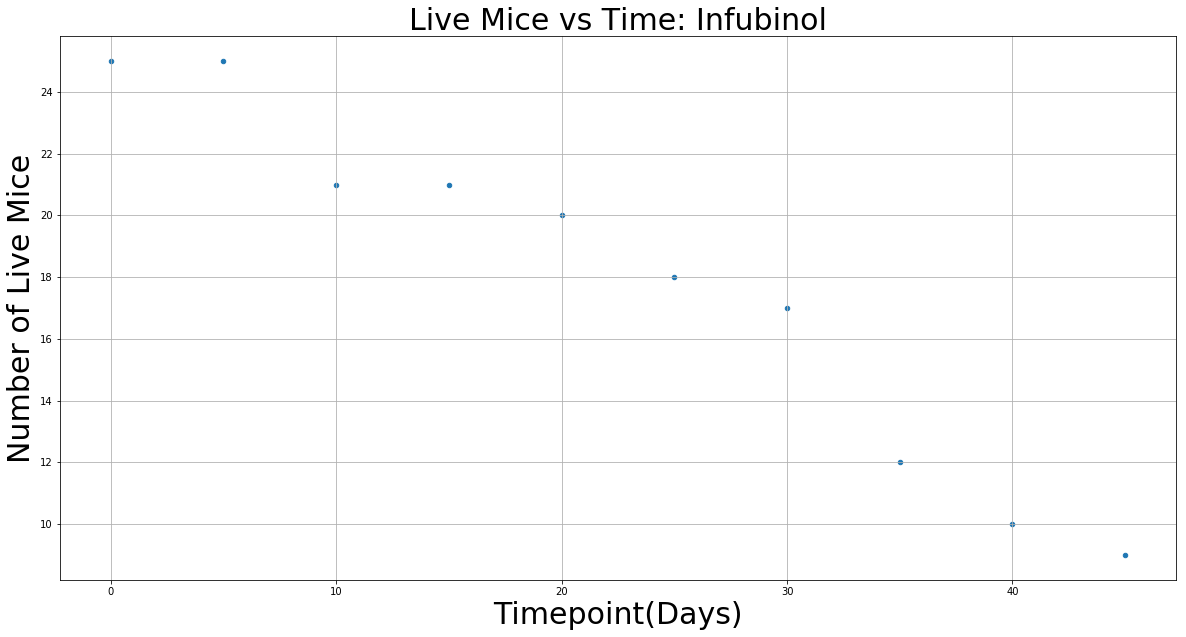

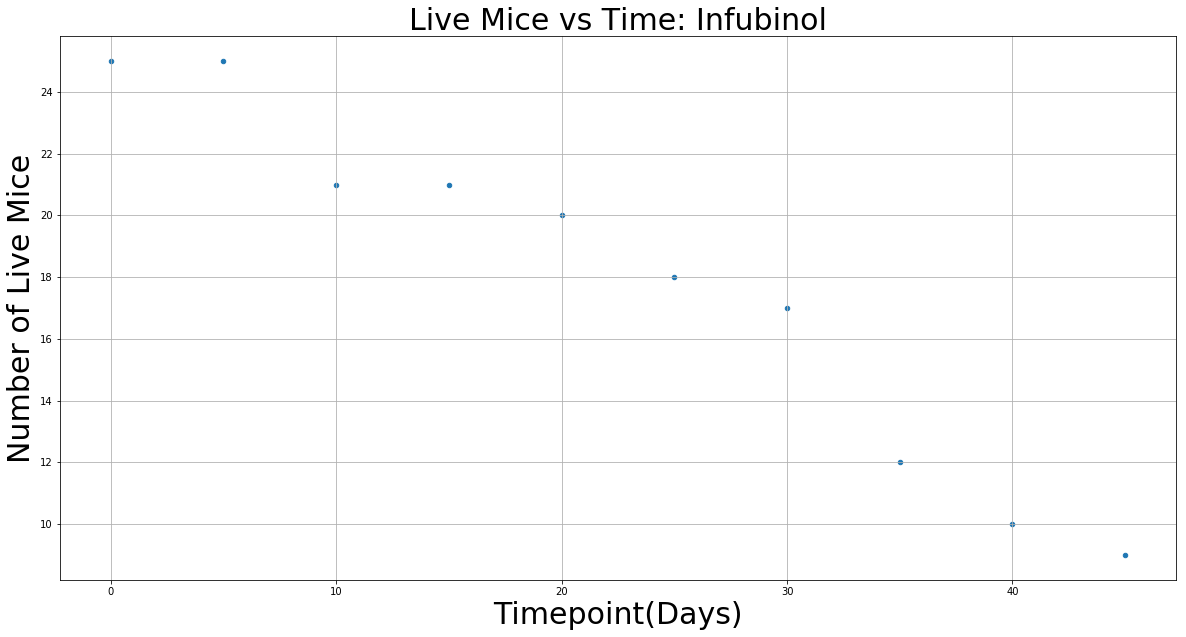

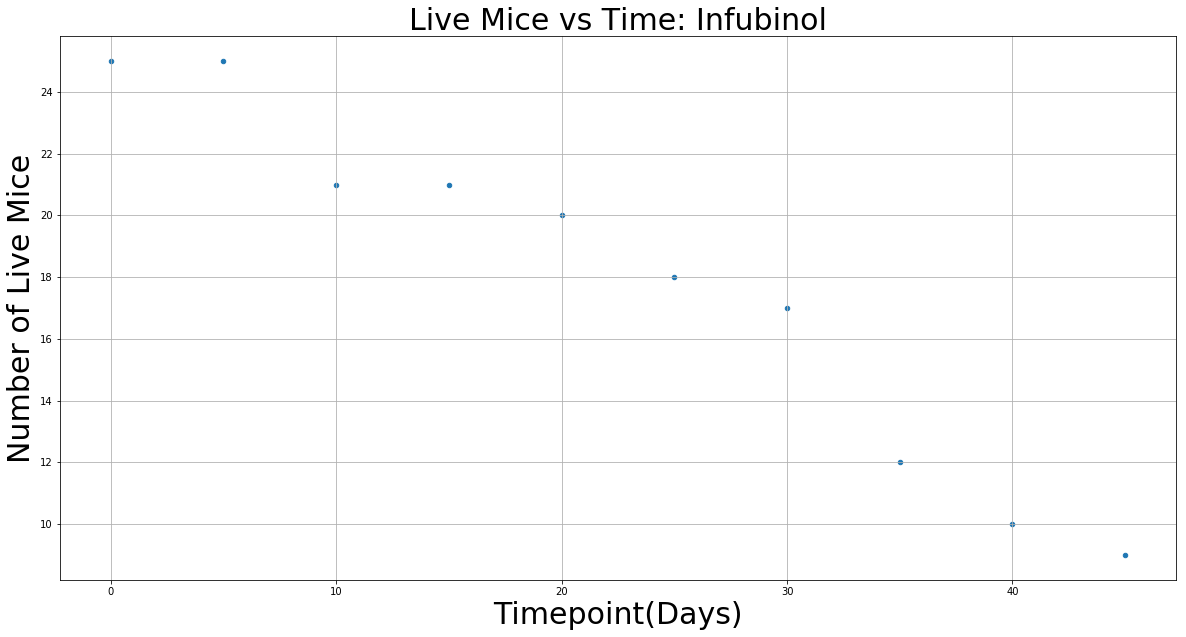

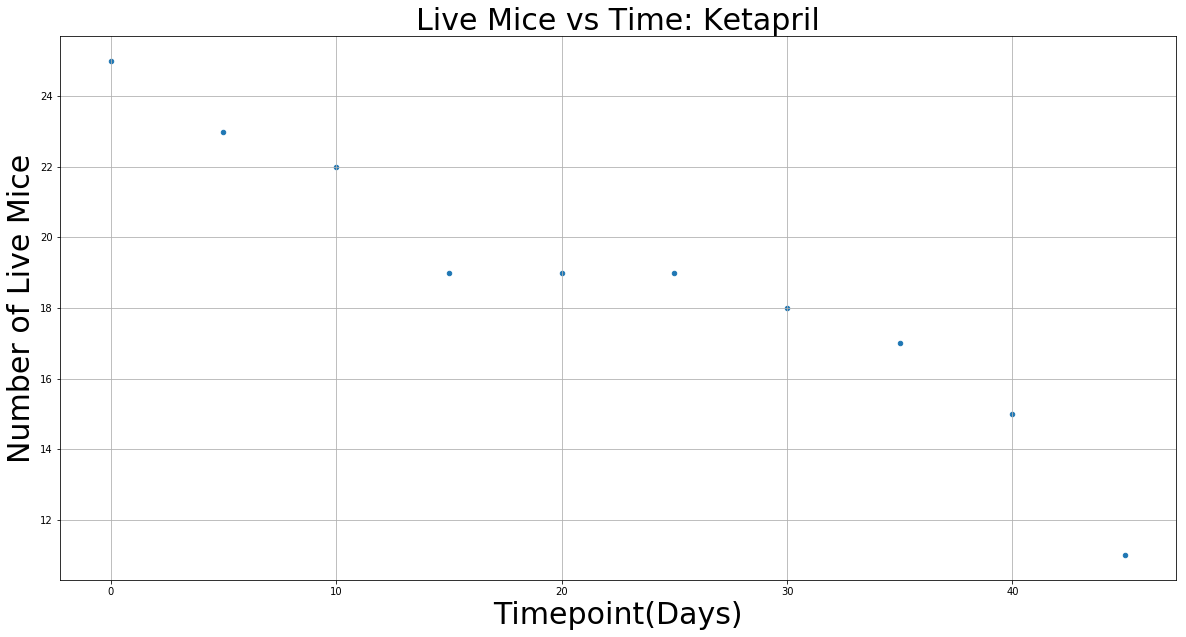

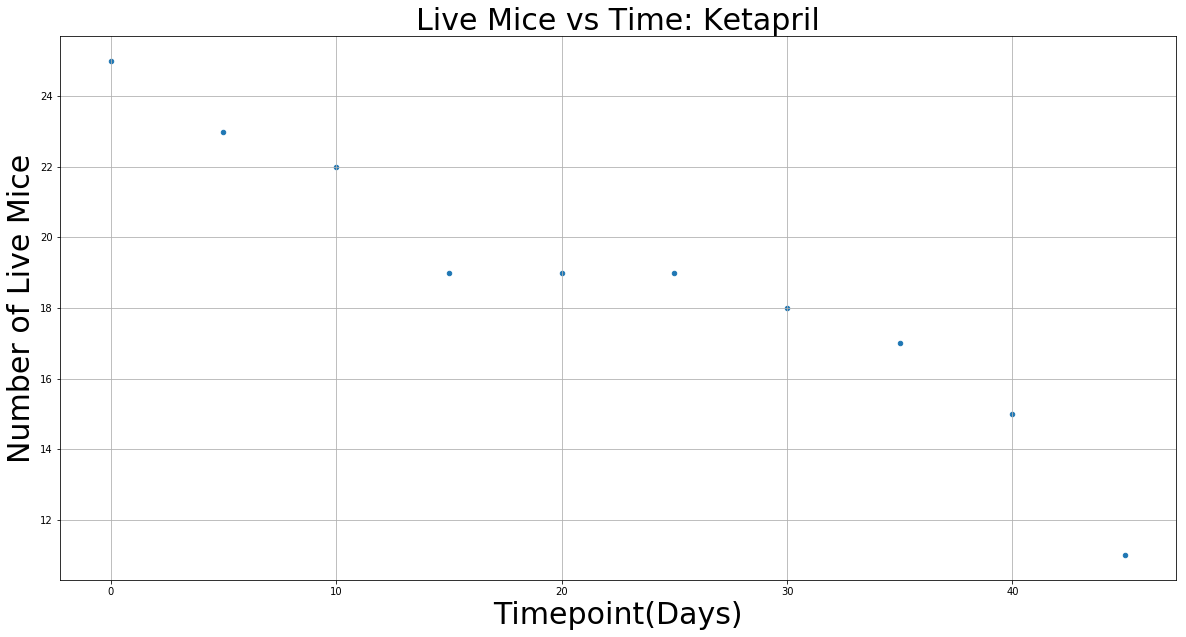

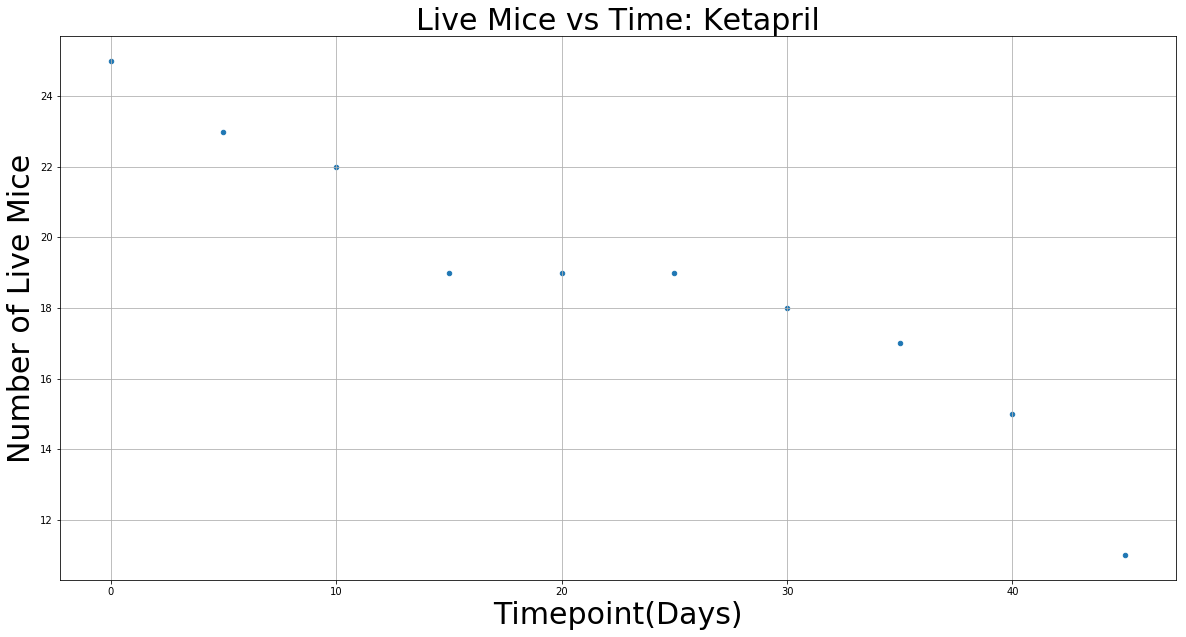

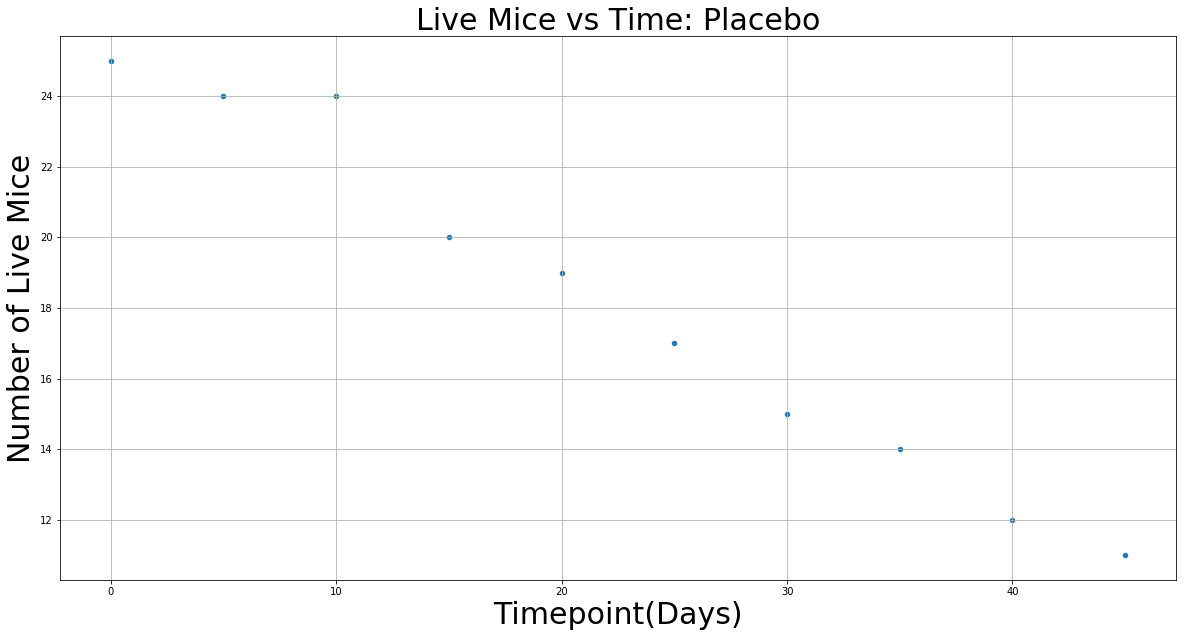

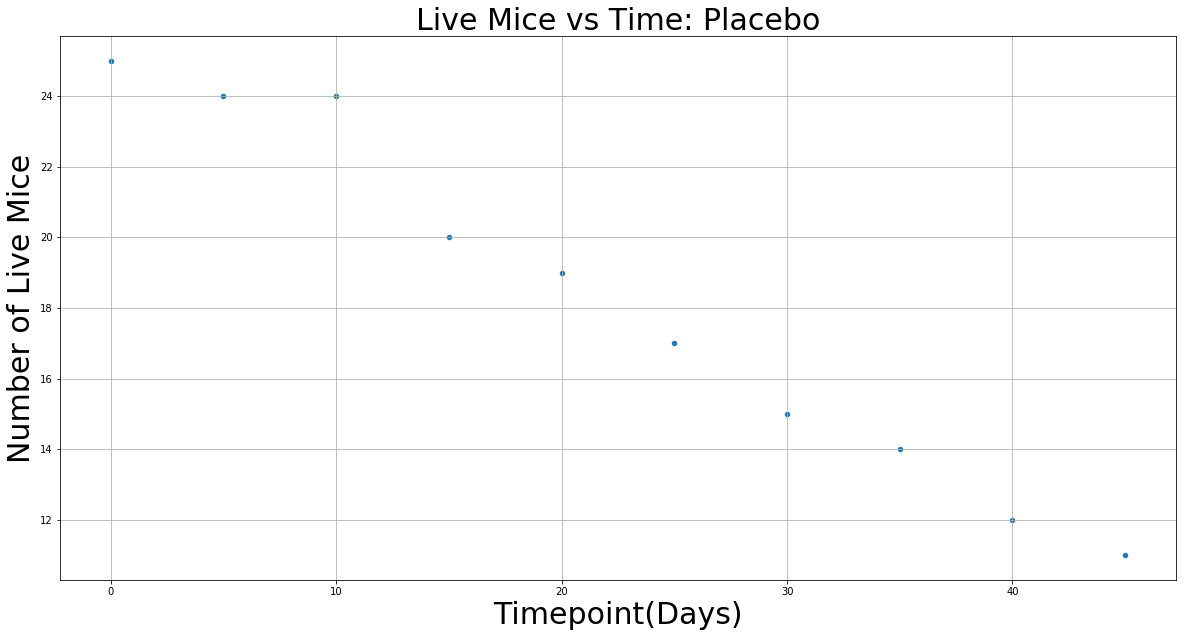

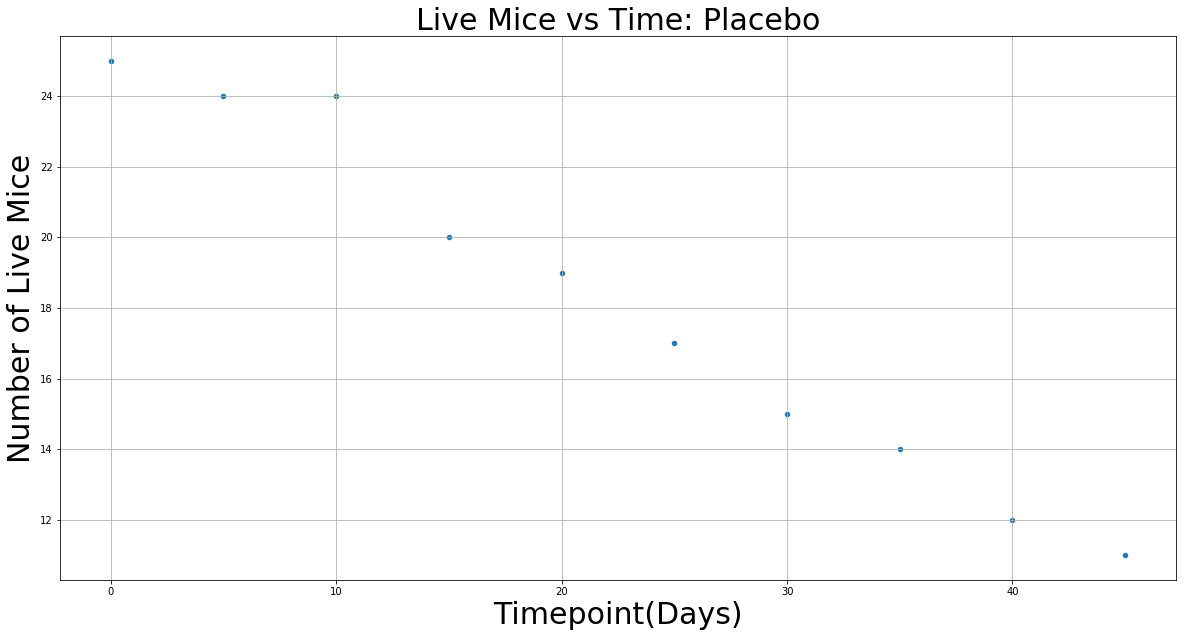

In [32]:
d2 = {}
for row in meta_df:
    for fear_and_loathing in las_vegas:
        d2[str(fear_and_loathing)] = meta_df.loc[meta_df['Drug'] == fear_and_loathing]  
for fear_and_loathing in las_vegas:
    for row in meta_df:
        d2[fear_and_loathing].plot(kind='scatter', x='Timepoint', y='Mouse ID', grid=True,
                 figsize=(20,10))
        plt.title('Live Mice vs Time: ' + fear_and_loathing, fontsize=fontsize)
        plt.xlabel('Timepoint(Days)', fontsize=fontsize)
        plt.ylabel('Number of Live Mice', fontsize=fontsize)
        

In [33]:
df['Tumor Volume Change'] = (df['Tumor Volume (mm3)'] - df['Tumor Volume (mm3)'].shift(1))/df['Tumor Volume (mm3)'].shift(1)

tvc_df = df.groupby(['Mouse ID']).sum().reset_index()
tvc_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Tumor Volume Change
0,a203,225,563.127077,11,0.161807
1,a251,225,552.370946,8,0.101836
2,a262,225,586.116306,23,0.147320
3,a275,225,527.709651,12,-0.002277
4,a366,105,382.479341,1,-0.024578
5,a401,225,540.007063,21,0.381658
6,a411,225,407.013854,8,0.278428
7,a444,225,430.600524,0,0.129363
8,a457,15,142.246310,0,-0.270553
9,a492,225,531.765128,5,0.332103


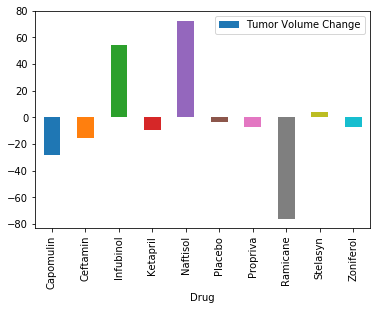

In [20]:
tvc_df.plot(kind='bar', x='Drug', y='Tumor Volume Change')